In [23]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from urllib.request import urlretrieve
%matplotlib inline

In [24]:
ecg_df = pd.read_csv('physionet_A_N.csv')

In [25]:
ecg_df.head()

,TS_0,TS_1,TS_2,TS_3,TS_4,TS_5,TS_6,TS_7,TS_8,TS_9,...,TS_261,TS_262,TS_263,TS_264,TS_265,TS_266,TS_267,TS_268,TS_269,CLASS
0,-127.0,-267.0,-241.0,-229.0,-215.0,-201.0,-253.0,-273.0,-226.0,-172.0,...,-29.0,-22.0,-19.0,-22.0,-43.0,-53.0,-23.0,22.0,-31.0,N
1,-41.0,663.0,-39.0,-113.0,-81.0,-67.0,-45.0,34.0,82.0,62.0,...,-22.0,42.0,104.0,32.0,2.0,2.0,-13.0,-16.0,6.0,N
2,7.0,7.0,12.0,18.0,36.0,80.0,0.0,-19.0,418.0,248.0,...,-22.0,-33.0,-31.0,-34.0,-11.0,1.0,-8.0,12.0,62.0,N
3,128.0,268.0,244.0,209.0,194.0,234.0,203.0,188.0,211.0,228.0,...,-70.0,-62.0,-44.0,393.0,-74.0,-84.0,-65.0,-30.0,-6.0,N
4,13.0,54.0,80.0,56.0,-36.0,1469.0,-199.0,-180.0,-177.0,-126.0,...,-15.0,-37.0,-50.0,-21.0,30.0,17.0,1571.0,-165.0,-201.0,N


# QA 1

### TS_0 to TS_269 are Continuous variables while the target variable CLASS is Categorical.

# QA 2

### Patterns and Trends analysis considering multiple features

In [26]:
ecg_df.describe()

,TS_0,TS_1,TS_2,TS_3,TS_4,TS_5,TS_6,TS_7,TS_8,TS_9,...,TS_260,TS_261,TS_262,TS_263,TS_264,TS_265,TS_266,TS_267,TS_268,TS_269
count,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,...,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000
mean,6.460425,5.024823,4.541698,6.391889,6.158356,5.750136,4.165106,3.910996,3.444529,3.132281,...,7.016222,8.752041,8.110343,10.027055,7.581383,7.465705,9.962929,9.961132,8.139575,8.737180
std,272.334830,420.495452,402.284830,386.746853,378.025853,364.795591,347.348664,343.027604,337.468859,324.780727,...,198.537713,192.926446,197.262111,199.259975,196.717561,199.346913,199.376930,197.770150,197.604523,201.765898
min,-3614.000000,-6466.000000,-5019.000000,-4764.000000,-5952.000000,-6422.000000,-5255.000000,-6984.000000,-4687.000000,-5096.000000,...,-3479.000000,-2398.000000,-2790.000000,-3484.000000,-3402.000000,-3597.000000,-3756.000000,-3384.000000,-3154.000000,-4153.000000
25%,-71.000000,-79.000000,-79.000000,-79.000000,-79.000000,-77.000000,-77.000000,-75.000000,-75.000000,-75.000000,...,-60.000000,-59.000000,-59.000000,-59.000000,-60.000000,-60.000000,-59.000000,-59.000000,-59.000000,-58.000000
50%,-8.000000,-9.000000,-9.000000,-9.000000,-11.000000,-10.000000,-10.000000,-10.000000,-9.000000,-8.000000,...,-9.000000,-10.000000,-10.000000,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-10.000000
75%,72.000000,82.000000,82.000000,80.000000,80.000000,79.000000,77.000000,73.000000,73.000000,70.750000,...,53.000000,52.000000,52.000000,53.000000,53.000000,52.000000,55.000000,55.000000,53.000000,53.000000
max,3344.000000,5514.000000,6134.000000,6305.000000,6479.000000,5658.000000,5728.000000,5847.000000,6070.000000,5308.000000,...,3109.000000,4482.000000,5790.000000,5405.000000,4082.000000,4027.000000,4170.000000,3503.000000,3908.000000,3190.000000


C:\Users\Madhav\AppData\Local\Temp\ipykernel_17324\3751354908.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ecg_df_corr = ecg_df.corr()


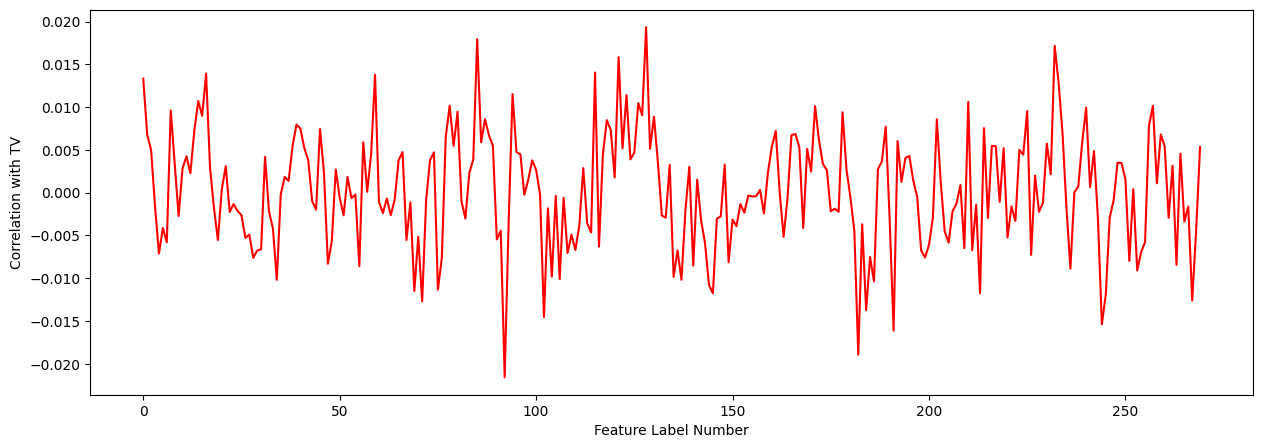

In [29]:
# Plotting correlation factors for all features with respect to the target variable 

# Target Variable TV
ecg_df['TV'] = np.where(ecg_df['CLASS']== 'A', 1, 0)
ecg_df_corr = ecg_df.corr() 
y = ecg_df_corr['TV'].iloc[:-1]
x = np.arange(0,270)
plt.xlabel("Feature Label Number")
plt.ylabel("Correlation with TV")
fig = plt.plot(x, y, color ="red")
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

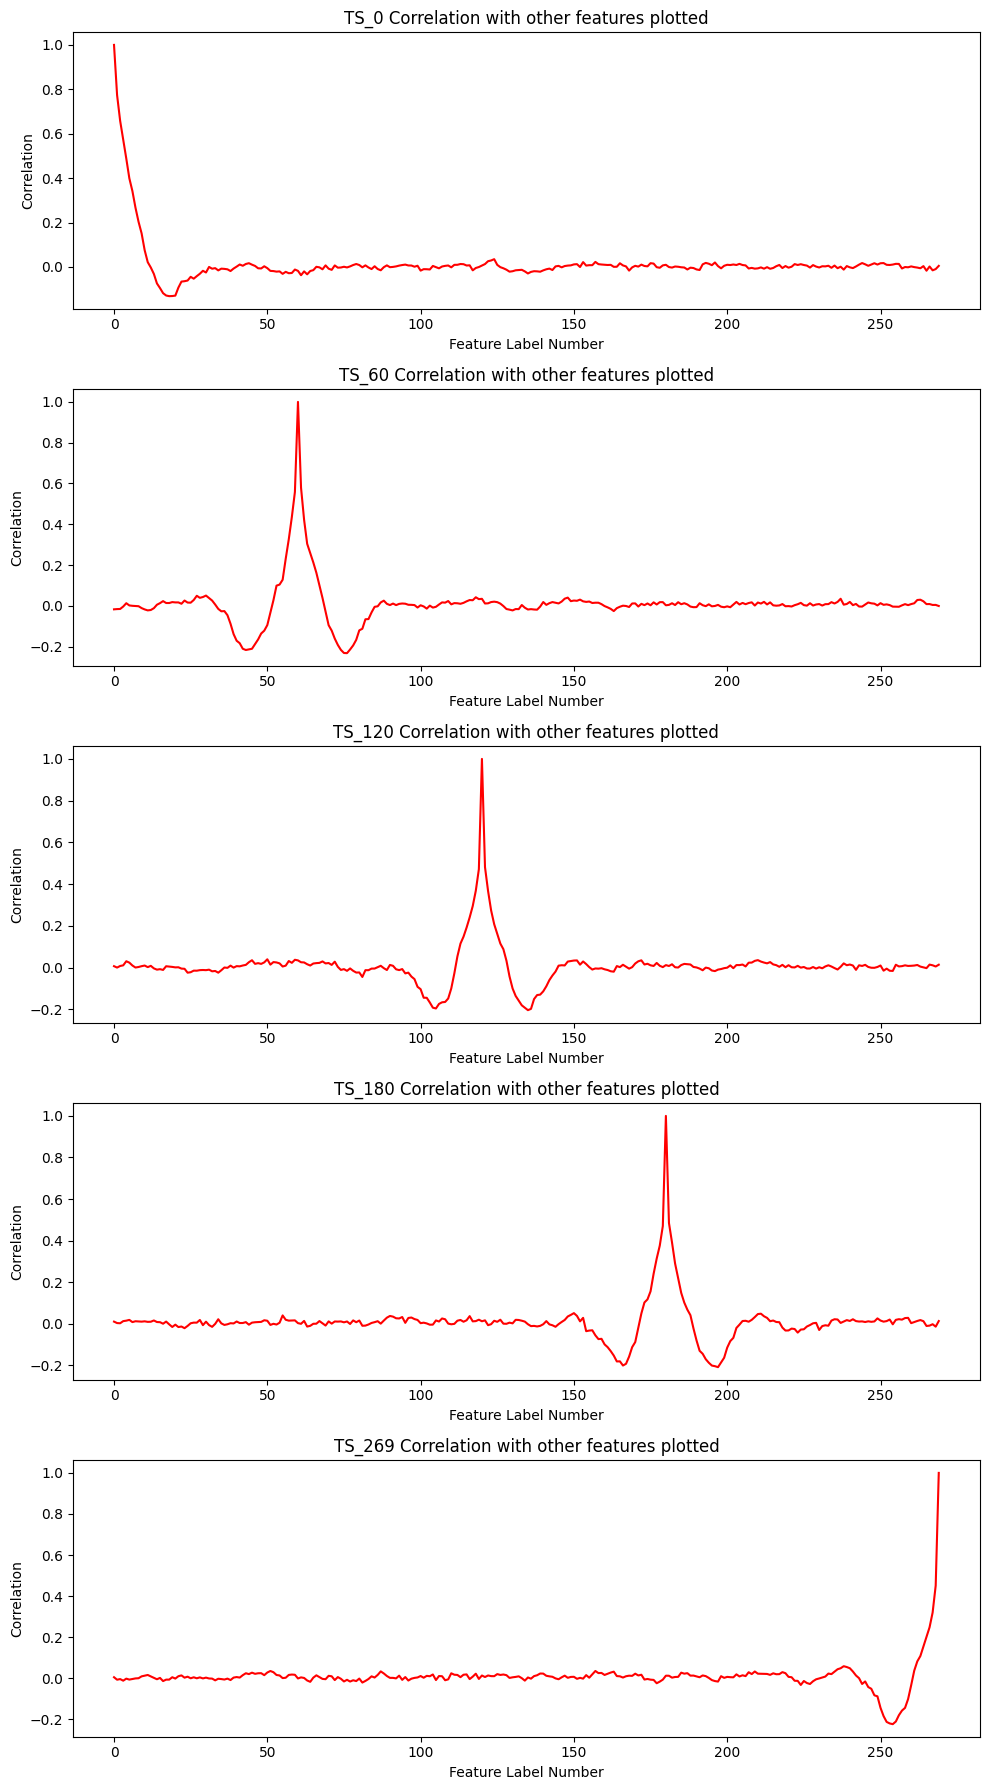

In [31]:
# Observing the locality of correlation for time series inpedendent variables

fig, axes = plt.subplots(5, 1, figsize=(10,18)) 
x = np.arange(0,270)

y = ecg_df_corr['TS_0'].iloc[:-1]
axes[0].set_xlabel("Feature Label Number")
axes[0].set_ylabel("Correlation")
axes[0].plot(x, y, color ="red")
axes[0].set_title('TS_0 Correlation with other features plotted')

y = ecg_df_corr['TS_60'].iloc[:-1]
axes[1].set_xlabel("Feature Label Number")
axes[1].set_ylabel("Correlation")
axes[1].plot(x, y, color ="red")
axes[1].set_title('TS_60 Correlation with other features plotted')

y = ecg_df_corr['TS_120'].iloc[:-1]
axes[2].set_xlabel("Feature Label Number")
axes[2].set_ylabel("Correlation")
axes[2].plot(x, y, color ="red")
axes[2].set_title('TS_120 Correlation with other features plotted')

y = ecg_df_corr['TS_180'].iloc[:-1]
axes[3].set_xlabel("Feature Label Number")
axes[3].set_ylabel("Correlation")
axes[3].plot(x, y, color ="red")
axes[3].set_title('TS_180 Correlation with other features plotted')

y = ecg_df_corr['TS_269'].iloc[:-1]
axes[4].set_xlabel("Feature Label Number")
axes[4].set_ylabel("Correlation")
axes[4].plot(x, y, color ="red")
axes[4].set_title('TS_269 Correlation with other features plotted')


plt.tight_layout()
plt.show()

# QA 3

### PCA to exclude features

In [32]:
from sklearn.preprocessing import StandardScaler

X = ecg_df.iloc[:,:-2]
y = ecg_df.iloc[:,-1]

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

Cumulative Variances (Percentage):
[ 3.3757953   6.33639716  9.13514593 11.80213574 14.39018987 16.8238977
 19.21613765 21.49214515 23.69200261 25.78826501 27.86873435 29.80967529
 31.66118464 33.43628305 35.04904053 36.52117914 37.87440652 39.11726499
 40.24695679 41.29547193 42.21288058 43.07332277 43.88409223 44.63554547
 45.34675426 45.98701632 46.6008861  47.20504521 47.77514473 48.32698569
 48.85746342 49.37721174 49.88546326 50.38606111 50.87545552 51.3574764
 51.82046254 52.28043915 52.73072197 53.18010765 53.62340899 54.0603507
 54.48956774 54.91733999 55.34019274 55.75781902 56.16764429 56.56999555
 56.97082275 57.36937392 57.76688639 58.15942395 58.54743915 58.93261804
 59.31503386 59.69420635 60.07270238 60.44821649 60.81687561 61.17936951
 61.53984661 61.89922597 62.25432096 62.60694617 62.95518612 63.29902257
 63.64076082 63.97960755 64.31560382 64.64602674 64.97474006 65.30072706
 65.62353646 65.9392145  66.25355911 66.56288316 66.8683041  67.16536635
 67.45584489 67.745

Text(0, 0.5, 'Explained variance (%)')

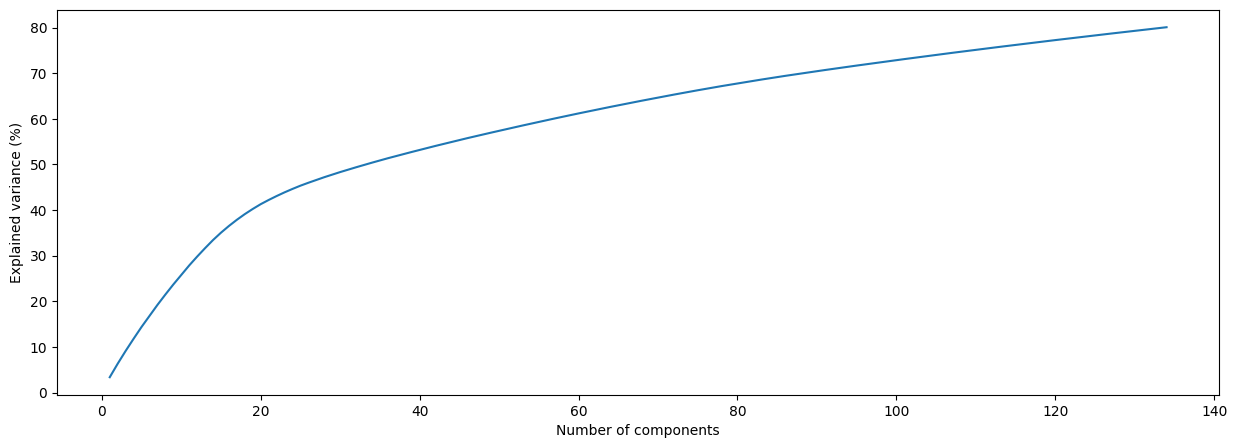

In [33]:
from sklearn.decomposition import PCA

# 134 features taken for an explained variance ratio of over 80%

pca = PCA(n_components = 0.80)
pca.fit(X_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [34]:
X_pca = pca.transform(X_scaled)
X = X_pca

# QA 4

### Categorical target variable converted to numerical (0 for 'N' and 1 for 'A') 

In [35]:
#ecg_df['TV'] = np.where(ecg_df['CLASS']!= 'A', 1, 0)

# QB and QC

### Multpile classification models applied and performance compared on multiple metrics

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42, shuffle=True) 

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (14696, 134)
X_test shape: (3674, 134)
y_train shape: (14696, 1)
y_test shape: (3674, 1)


In [38]:
result_df = pd.DataFrame(columns=['Index','Logistic Regression','KNN','SVM','Decision Tree','Random Forest','Gaussian NB'])
result_df['Index'] = ['Accuracy','Precision','Recall', 'F1 Score']
result_df.set_index("Index", inplace = True)
result_df

,Logistic Regression,KNN,SVM,Decision Tree,Random Forest,Gaussian NB
Index,,,,,,
Accuracy,NaN,NaN,NaN,NaN,NaN,NaN
Precision,NaN,NaN,NaN,NaN,NaN,NaN
Recall,NaN,NaN,NaN,NaN,NaN,NaN
F1 Score,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
reg = LogisticRegression(random_state = 42)
accuracies = cross_val_score(reg, X_train, y_train, cv=5)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
result_df['Logistic Regression']['Accuracy'] = accuracy_score(y_test,y_pred)
result_df['Logistic Regression']['Precision'] = precision_score(y_test,y_pred)
result_df['Logistic Regression']['Recall'] = recall_score(y_test,y_pred)
result_df['Logistic Regression']['F1 Score'] = f1_score(y_test,y_pred)

C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: D

In [40]:
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, X_train, y_train, cv=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
result_df['KNN']['Accuracy'] = accuracy_score(y_test,y_pred)
result_df['KNN']['Precision'] = precision_score(y_test,y_pred)
result_df['KNN']['Recall'] = recall_score(y_test,y_pred)
result_df['KNN']['F1 Score'] = f1_score(y_test,y_pred)

C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:2

In [41]:
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
result_df['SVM']['Accuracy'] = accuracy_score(y_test,y_pred)
result_df['SVM']['Precision'] = precision_score(y_test,y_pred)
result_df['SVM']['Recall'] = recall_score(y_test,y_pred)
result_df['SVM']['F1 Score'] = f1_score(y_test,y_pred)

C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: D

In [42]:
dtc = DecisionTreeClassifier(random_state = 42)
accuracies = cross_val_score(dtc, X_train, y_train, cv=5)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
result_df['Decision Tree']['Accuracy'] = accuracy_score(y_test,y_pred)
result_df['Decision Tree']['Precision'] = precision_score(y_test,y_pred)
result_df['Decision Tree']['Recall'] = recall_score(y_test,y_pred)
result_df['Decision Tree']['F1 Score'] = f1_score(y_test,y_pred)

In [43]:
rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, X_train, y_train, cv=5)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
result_df['Random Forest']['Accuracy'] = accuracy_score(y_test,y_pred)
result_df['Random Forest']['Precision'] = precision_score(y_test,y_pred)
result_df['Random Forest']['Recall'] = recall_score(y_test,y_pred)
result_df['Random Forest']['F1 Score'] = f1_score(y_test,y_pred)

C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Madhav\AppData\Local\Program

In [44]:
gnb = GaussianNB()
accuracies = cross_val_score(gnb, X_train, y_train, cv=5)
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
result_df['Gaussian NB']['Accuracy'] = accuracy_score(y_test,y_pred)
result_df['Gaussian NB']['Precision'] = precision_score(y_test,y_pred)
result_df['Gaussian NB']['Recall'] = recall_score(y_test,y_pred)
result_df['Gaussian NB']['F1 Score'] = f1_score(y_test,y_pred)

C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: D

In [55]:
# Imbalanced data set results
imb_result_df = result_df 
imb_result_df

,Logistic Regression,KNN,SVM,Decision Tree,Random Forest,Gaussian NB
Index,,,,,,
Accuracy,0.876429,0.877246,0.876973,0.769189,0.875068,0.360915
Precision,0.0,0.538462,0.0,0.141304,0.0,0.133127
Recall,0.0,0.015487,0.0,0.172566,0.0,0.761062
F1 Score,0.0,0.030108,0.0,0.155378,0.0,0.226614


# QD

### SMOTE for imbalanced dataset

In [56]:
# Heavily imbalanced Dataset
ecg_df['TV'].value_counts()

0    16030
1     2340
Name: TV, dtype: int64

In [57]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42, shuffle=True)
X_train, y_train = sm.fit_resample(X_train, y_train)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (25616, 134)
X_test shape: (3674, 134)
y_train shape: (25616, 1)
y_test shape: (3674, 1)


In [59]:
result_df = pd.DataFrame(columns=['Index','Logistic Regression','KNN','SVM','Decision Tree','Random Forest','Gaussian NB'])
result_df['Index'] = ['Accuracy','Precision','Recall', 'F1 Score']
result_df.set_index("Index", inplace = True)
result_df

,Logistic Regression,KNN,SVM,Decision Tree,Random Forest,Gaussian NB
Index,,,,,,
Accuracy,NaN,NaN,NaN,NaN,NaN,NaN
Precision,NaN,NaN,NaN,NaN,NaN,NaN
Recall,NaN,NaN,NaN,NaN,NaN,NaN
F1 Score,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
reg = LogisticRegression(random_state = 42)
accuracies = cross_val_score(reg, X_train, y_train, cv=5)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
result_df['Logistic Regression']['Accuracy'] = accuracy_score(y_test,y_pred)
result_df['Logistic Regression']['Precision'] = precision_score(y_test,y_pred)
result_df['Logistic Regression']['Recall'] = recall_score(y_test,y_pred)
result_df['Logistic Regression']['F1 Score'] = f1_score(y_test,y_pred)

C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: D

In [61]:
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, X_train, y_train, cv=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
result_df['KNN']['Accuracy'] = accuracy_score(y_test,y_pred)
result_df['KNN']['Precision'] = precision_score(y_test,y_pred)
result_df['KNN']['Recall'] = recall_score(y_test,y_pred)
result_df['KNN']['F1 Score'] = f1_score(y_test,y_pred)

C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:2

In [62]:
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
result_df['SVM']['Accuracy'] = accuracy_score(y_test,y_pred)
result_df['SVM']['Precision'] = precision_score(y_test,y_pred)
result_df['SVM']['Recall'] = recall_score(y_test,y_pred)
result_df['SVM']['F1 Score'] = f1_score(y_test,y_pred)

C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: D

In [63]:
dtc = DecisionTreeClassifier(random_state = 42)
accuracies = cross_val_score(dtc, X_train, y_train, cv=5)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
result_df['Decision Tree']['Accuracy'] = accuracy_score(y_test,y_pred)
result_df['Decision Tree']['Precision'] = precision_score(y_test,y_pred)
result_df['Decision Tree']['Recall'] = recall_score(y_test,y_pred)
result_df['Decision Tree']['F1 Score'] = f1_score(y_test,y_pred)

In [64]:
rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, X_train, y_train, cv=5)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
result_df['Random Forest']['Accuracy'] = accuracy_score(y_test,y_pred)
result_df['Random Forest']['Precision'] = precision_score(y_test,y_pred)
result_df['Random Forest']['Recall'] = recall_score(y_test,y_pred)
result_df['Random Forest']['F1 Score'] = f1_score(y_test,y_pred)

C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Madhav\AppData\Local\Program

In [65]:
gnb = GaussianNB()
accuracies = cross_val_score(gnb, X_train, y_train, cv=5)
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
result_df['Gaussian NB']['Accuracy'] = accuracy_score(y_test,y_pred)
result_df['Gaussian NB']['Precision'] = precision_score(y_test,y_pred)
result_df['Gaussian NB']['Recall'] = recall_score(y_test,y_pred)
result_df['Gaussian NB']['F1 Score'] = f1_score(y_test,y_pred)

C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Madhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: D

In [66]:
#Improved results after SMOTE
result_df

,Logistic Regression,KNN,SVM,Decision Tree,Random Forest,Gaussian NB
Index,,,,,,
Accuracy,0.529668,0.675014,0.722646,0.6957,0.83288,0.439031
Precision,0.118421,0.229197,0.18324,0.159509,0.19084,0.121412
Recall,0.438053,0.69469,0.362832,0.345133,0.110619,0.570796
F1 Score,0.186441,0.344676,0.243504,0.218182,0.140056,0.200233
